###Lukas Mosser

In [1]:
import numpy as np
from math import factorial
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##Computation of Stehfest Coefficients

In [2]:
stehfest_coeffs = np.zeros((19, len(range(2, 20, 2))))
for N_col, N in enumerate(range(2, 20, 2)):
    for i_col, i in enumerate(range(1, N+1)):
        V_i = 0.
        for k in range(int(np.floor((i+1)/2.)), int(min(i, N/2.))+1):
            V_i += (np.power(k, N/2.)*factorial(2*k))/(factorial(N/2.-k)*factorial(k)*factorial(k-1)*factorial(i-k)*factorial(2*k-i))
        V_i *= np.power(-1, N/2.+i)
        stehfest_coeffs[i_col][N_col] = V_i

data = pd.DataFrame(stehfest_coeffs)

See results assignement 1

##Inversion of dual porosity type curve incl. wellbore storage:

$$\widetilde{P_{D}}[(C_{D}e^{2Skin})_{f+m}, s]=\frac{1}{s[s+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{sf(s)}{(C_{D}e^{2Skin})_{f+m}}}}}]}$$
$$s=sC_{D_{f+m}}$$
$$f(s)=\frac{\omega(1-\omega)s+\lambda C_{D_{f+m}}}{(1-\omega)s+\lambda C_{D_{f+m}}}=\frac{\omega(1-\omega)s+(\lambda e^{-2S})( C_{D_{f+m}}e^{2S})}{(1-\omega)s+(\lambda e^{-2S})(C_{D_{f+m}}e^{2S})}$$
$$\omega = \frac{(C_{D}e^{2S})_{f+m}}{(C_{D}e^{2S})_{f}}$$

We will invert the function for two sets of parameters:

Set A:
$$(C_{D}e^{2S})_{f} = 1e6$$
$$(C_{D}e^{2S})_{f+m} = 1e4$$
$$\lambda e^{-2S}=1e-8$$
$$\omega=1e-2$$
Set B:
$$(C_{D}e^{2S})_{f} = 1$$
$$(C_{D}e^{2S})_{f+m} = 0.1$$
$$\lambda e^{-2S}=1e-3$$
$$\omega=1e-1$$

Using the given Gaver-Stehfest algorithm the required expanded to:
$$P_{D}(C_{D}, S, t_{D}) = \frac{ln(2)C_{D}}{t_{D}}\sum\limits_{i=1}^N V_{i} \frac{1}{i\frac{ln2 C_{D}}{t_{D}}[i\frac{ln2 C_{D}}{t_{D}}+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{i\frac{ln2 C_{D}}{t_{D}}*f(i\frac{ln2 C_{D}}{t_{D}})}{C_{D}e^{2Skin}}}}}]}$$
$$s'=sC_{D}$$

The derivative of a laplace transformed function is given as $$\frac{df(t)}{dt}=s\widetilde{P(s)}-f(t=0)$$
We can therefore express the derivative of the type curve derivative as:
$$\frac{dP_{wD}(\frac{t_{D}}{C_{D}}, C_{D}e^{2S})}{dln(\frac{t_{D}}{C_{D}})}=\frac{t_{D}}{C_{D}}\frac{dP_{wD}(\frac{t_{D}}{C_{D}}, C_{D}e^{2S})}{d(\frac{t_{D}}{C_{D}})}=s'\widetilde{P(s')}-0$$
Using the given Gaver-Stehfest algorithm the required term can be expanded to:
$$\frac{dP_{wD}(\frac{t_{D}}{C_{D}}, C_{D}e^{2S})}{d(\frac{t_{D}}{C_{D}})}=s'\widetilde{P(s')} = \frac{ln(2)C_{D}}{t_{D}}\sum\limits_{i=1}^N V_{i} \frac{i\frac{ln2 C_{D}}{t_{D}}}{i\frac{ln2 C_{D}}{t_{D}}[i\frac{ln2 C_{D}}{t_{D}}+\frac{1}{ln\frac{2}{\gamma \sqrt{\frac{i\frac{ln2 C_{D}}{t_{D}}*f(i\frac{ln2 C_{D}}{t_{D}})}{C_{D}e^{2Skin}}}}}]}$$

In [3]:
def gringarten_double_poro_type_curve(i, tD_CD, CD_e_skin_f, CD_e_skin_fm, lambda_s):
    w = CD_e_skin_fm/CD_e_skin_f
    s_dash = i*np.log(2)*1/tD_CD
    f_s = (w*(1-w)*s_dash+(lambda_s*CD_e_skin_fm))/((1-w)*s_dash+(lambda_s*CD_e_skin_fm))
    return 1./(s_dash*(s_dash+(1/(np.log(2/(1.781*np.sqrt(s_dash*f_s/CD_e_skin_fm)))))))

In [4]:
def gringarten_double_poro_type_curve_der(i, tD_CD, CD_e_skin_f, CD_e_skin_fm, lambda_s):
    w = CD_e_skin_fm/CD_e_skin_f
    s_dash = i*np.log(2)*1/tD_CD
    f_s = (w*(1.-w)*s_dash+(lambda_s*CD_e_skin_fm))/((1.-w)*s_dash+(lambda_s*CD_e_skin_fm))
    return s_dash/(s_dash*(s_dash+(1/(np.log(2/(1.781*np.sqrt(s_dash*f_s/CD_e_skin_fm)))))))

In [5]:
def gringarten_double_poro_type_curve_early(i, tD_CD, CD_e_skin_f):
    s_dash = i*np.log(2)*1/tD_CD
    return 1./(s_dash*(s_dash+(1/(np.log(2/(1.781*np.sqrt(s_dash/CD_e_skin_f)))))))

def gringarten_double_poro_type_curve_mid(i, tD_CD, lambda_s):
    s_dash = i*np.log(2)*1/tD_CD
    return 1./(s_dash*(s_dash+(1/(np.log(2/(1.781*np.sqrt(lambda_s)))))))

def gringarten_double_poro_type_curve_late(i, tD_CD, CD_e_skin_fm):
    s_dash = i*np.log(2)*1/tD_CD
    return 1./(s_dash*(s_dash+(1/(np.log(2/(1.781*np.sqrt(s_dash/CD_e_skin_fm)))))))

In [6]:
val = 0.
exponents = [-1, 0, 1, 2, 3, 4, 5, 6]
lowers = np.linspace(1, 10, 1000)[0:-1]
tD_CDs = []
for exponent in exponents:
    for lower in lowers:
        tD_CDs.append(float(str(lower)+'e'+str(exponent)))

CD_e_skins_fm = [1e4, 0.1]
CD_e_skins_f = [1e6, 1]
lambda_s_s = [1e-8, 1e-3]

N = 10
N_index = 4

inversion = np.zeros((len(tD_CDs), len(CD_e_skins_fm)+1))
inversion[:,0] = tD_CDs
for inv_index, (CD_e_skin_f, CD_e_skin_fm, lambda_s) in enumerate(zip(CD_e_skins_f, CD_e_skins_fm, lambda_s_s)):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_double_poro_type_curve(i+1, tD_CD, CD_e_skin_f, CD_e_skin_fm, lambda_s)
        val *= np.log(2)*1/tD_CD
        inversion[k][inv_index+1] = val

In [7]:
inversion_early = np.zeros((len(tD_CDs), len(CD_e_skins_fm)+1))
inversion_early[:,0] = tD_CDs
for inv_index, (CD_e_skin_f, CD_e_skin_fm, lambda_s) in enumerate(zip(CD_e_skins_f, CD_e_skins_fm, lambda_s_s)):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_double_poro_type_curve_early(i+1, tD_CD, CD_e_skin_f)
        val *= np.log(2)*1/tD_CD
        inversion_early[k][inv_index+1] = val

In [8]:
inversion_mid = np.zeros((len(tD_CDs), len(CD_e_skins_fm)+1))
inversion_mid[:,0] = tD_CDs
for inv_index, (CD_e_skin_f, CD_e_skin_fm, lambda_s) in enumerate(zip(CD_e_skins_f, CD_e_skins_fm, lambda_s_s)):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_double_poro_type_curve_mid(i+1, tD_CD, lambda_s)
        val *= np.log(2)*1/tD_CD
        inversion_mid[k][inv_index+1] = val

In [9]:
inversion_late = np.zeros((len(tD_CDs), len(CD_e_skins_fm)+1))
inversion_late[:,0] = tD_CDs
for inv_index, (CD_e_skin_f, CD_e_skin_fm, lambda_s) in enumerate(zip(CD_e_skins_f, CD_e_skins_fm, lambda_s_s)):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_double_poro_type_curve_late(i+1, tD_CD, CD_e_skin_fm)
        val *= np.log(2)*1/tD_CD
        inversion_late[k][inv_index+1] = val

In [10]:
val = 0.
exponents = [-1, 0, 1, 2, 3, 4, 5, 6]
lowers = np.linspace(1, 10, 1000)[0:-1]
tD_CDs = []
for exponent in exponents:
    for lower in lowers:
        tD_CDs.append(float(str(lower)+'e'+str(exponent)))

CD_e_skins_fm = [1e4, 0.1]
CD_e_skins_f = [1e6, 1.]
lambda_s_s = [1e-8, 1e-3]

N = 10
N_index = 4

grin_der_inv = np.zeros((len(tD_CDs), len(CD_e_skins_fm)+1))
grin_der_inv[:,0] = tD_CDs
for inv_index, (CD_e_skin_fm, CD_e_skin_f, lambda_s) in enumerate(zip(CD_e_skins_fm, CD_e_skins_f, lambda_s_s)):
    pD = []
    for k, tD_CD in enumerate(tD_CDs):
        val = 0.
        for i in range(N+1):
            val += stehfest_coeffs[i][N_index]*gringarten_double_poro_type_curve_der(i+1, tD_CD, CD_e_skin_f, CD_e_skin_fm, lambda_s)
        val *= np.log(2)*1/tD_CD
        grin_der_inv[k][inv_index+1] = val
        
for i in range(len(CD_e_skins_fm)):
    grin_der_inv[:, i+1] = np.multiply(grin_der_inv[:, 0], grin_der_inv[:, i+1])

We load the solution data from the excel sheet:

In [11]:
actual_data = pd.read_excel("solution_ex5.xlsx", sheetname="Sheet1", header=0, skiprows=1)

##Plot of Double Porosity Type curve and derivative for parameter set A

$$\frac{t_{D}}{C_{D}} \ in \ range \ [1e-1 \ , \ 1e6]$$
For set A of the parameters.

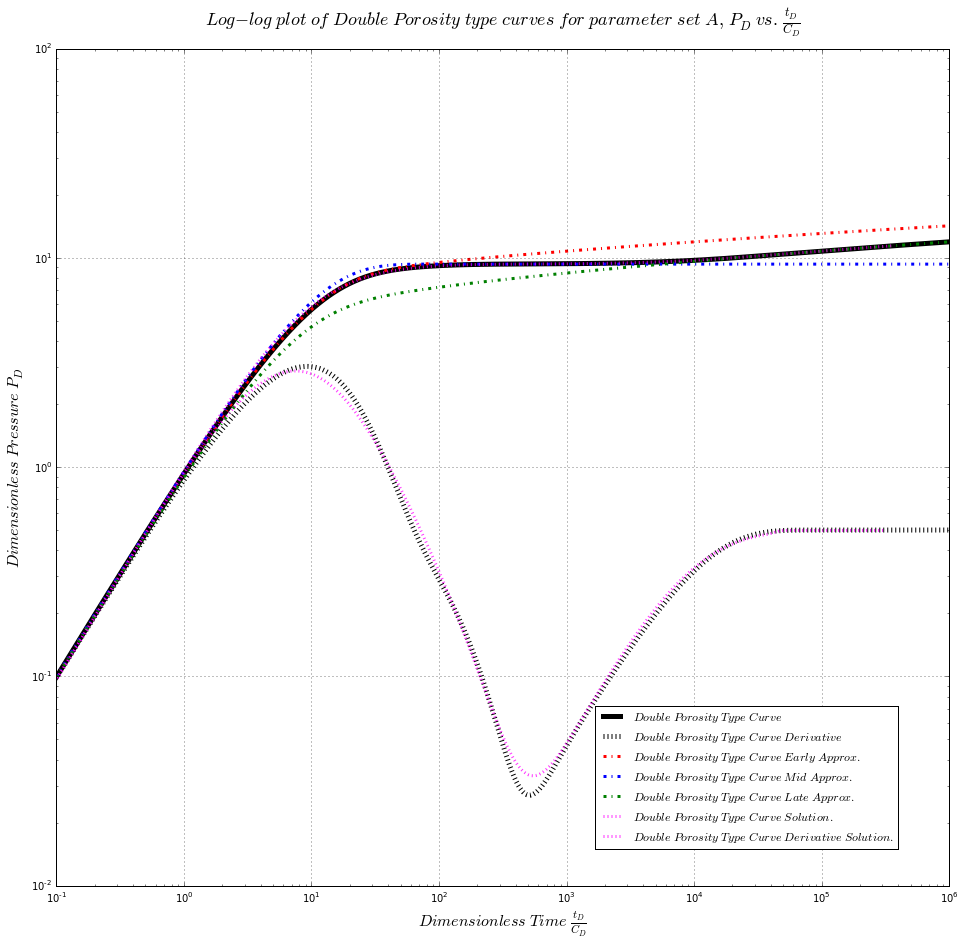

In [12]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=1.0e6)
ax.set_ylim(bottom=1e-2, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Double \ Porosity \ type \ curves \ for \ parameter \ set \ A, \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

ax.plot(inversion[:, 0], inversion[:, 1], 
    color="black", linestyle='-', label='$Double \ Porosity \ Type \ Curve$', linewidth=5)
ax.plot(grin_der_inv[:, 0], grin_der_inv[:, 1], 
    color="black", linestyle=':', label='$Double \ Porosity \ Type \ Curve \ Derivative$', linewidth=5)

ax.plot(inversion_early[:, 0], inversion_early[:, 1], 
    color="red", linestyle='-.', label='$Double \ Porosity \ Type \ Curve \ Early \ Approx.$', linewidth=3)

ax.plot(inversion_mid[:, 0], inversion_mid[:, 1], 
    color="blue", linestyle='-.', label='$Double \ Porosity \ Type \ Curve \ Mid \ Approx.$', linewidth=3)

ax.plot(inversion_late[:, 0], inversion_late[:, 1], 
    color="green", linestyle='-.', label='$Double \ Porosity \ Type \ Curve \ Late \ Approx.$', linewidth=3)

ax.plot(actual_data.ix[:,8], actual_data.ix[:,9], 
    color="magenta", linestyle=':', label='$Double \ Porosity \ Type \ Curve \ Solution.$', linewidth=3, alpha=0.8)

ax.plot(actual_data.ix[:,8], actual_data.ix[:,10], 
    color="magenta", linestyle=':', label='$Double \ Porosity \ Type \ Curve \ Derivative \ Solution.$', linewidth=3, alpha=0.8)
                
plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

##Plot of Double Porosity Type curve and derivative for parameter set B

$$\frac{t_{D}}{C_{D}} \ in \ range \ [1e-1 \ , \ 1e6]$$
For set B of the parameters.

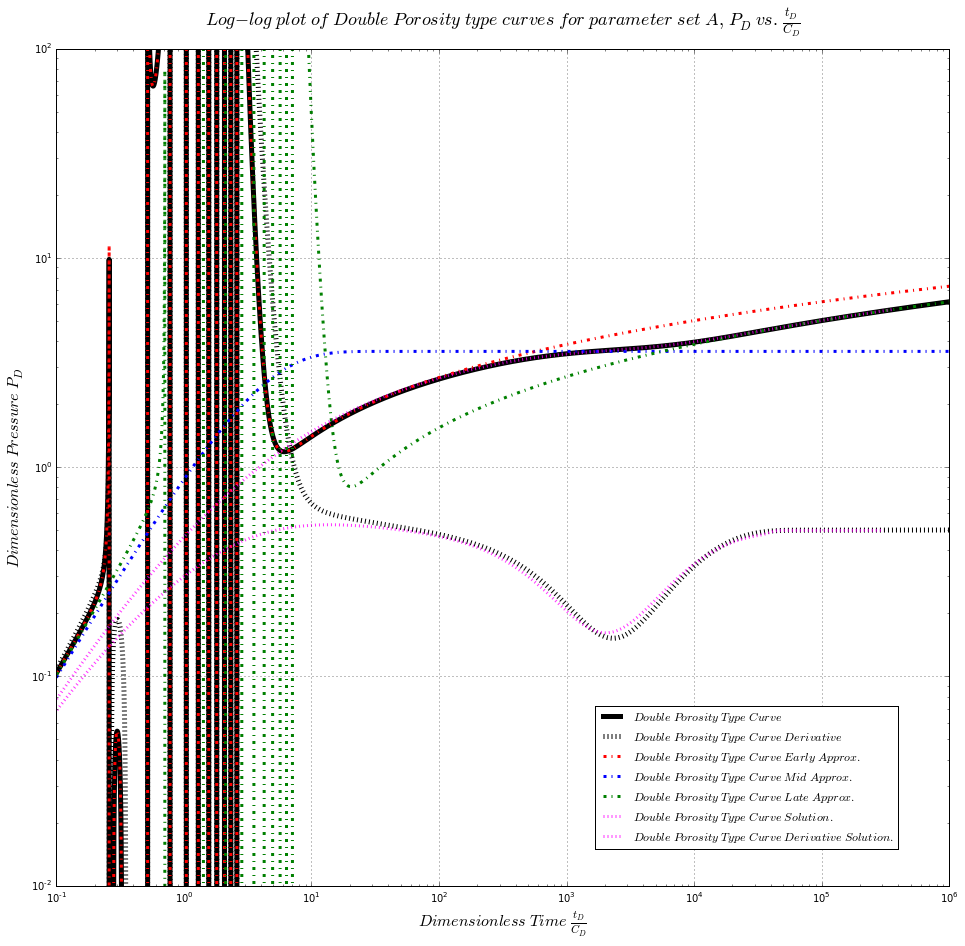

In [13]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-1,right=1.0e6)
ax.set_ylim(bottom=1e-2, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Double \ Porosity \ type \ curves \ for \ parameter \ set \ A, \ P_{D} \ vs. \ \frac{t_{D}}{C_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

ax.plot(inversion[:, 0], inversion[:, 2], 
    color="black", linestyle='-', label='$Double \ Porosity \ Type \ Curve$', linewidth=5)
ax.plot(grin_der_inv[:, 0], grin_der_inv[:, 2], 
    color="black", linestyle=':', label='$Double \ Porosity \ Type \ Curve \ Derivative$', linewidth=5)

ax.plot(inversion_early[:, 0], inversion_early[:, 2], 
    color="red", linestyle='-.', label='$Double \ Porosity \ Type \ Curve \ Early \ Approx.$', linewidth=3)

ax.plot(inversion_mid[:, 0], inversion_mid[:, 2], 
    color="blue", linestyle='-.', label='$Double \ Porosity \ Type \ Curve \ Mid \ Approx.$', linewidth=3)

ax.plot(inversion_late[:, 0], inversion_late[:, 2], 
    color="green", linestyle='-.', label='$Double \ Porosity \ Type \ Curve \ Late \ Approx.$', linewidth=3)

ax.plot(actual_data.ix[:,19], actual_data.ix[:,20], 
    color="magenta", linestyle=':', label='$Double \ Porosity \ Type \ Curve \ Solution.$', linewidth=3, alpha=0.8)

ax.plot(actual_data.ix[:,19], actual_data.ix[:,21], 
    color="magenta", linestyle=':', label='$Double \ Porosity \ Type \ Curve \ Derivative \ Solution.$', linewidth=3, alpha=0.8)
 
                
plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

We can observe that the computation of the type curves is stable for early and late times, instable for intermediate times for parameter set B. All times show stable behavior for parameter set A. Parameter set A has a much more pronounced "Hump" than parameter set B. Parameter set B has a "Hump" at later times, leading to conclusion that the recharge comes later in the systems time and that there is a stabilization to radial flow, before the system is recharged.